In [1]:
#set working directory
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
os.chdir('D:\APDS\Project\Yelp\py workspace')

In [2]:
df_processed = pd.read_pickle('df_processed.pkl')

In [3]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51379 entries, 0 to 51378
Data columns (total 7 columns):
business_id      51379 non-null object
city             51379 non-null int64
state            51379 non-null int64
stars            51379 non-null float64
review_count     51379 non-null float64
is_open          51379 non-null int64
checkin_count    51379 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.1+ MB


In [4]:
df_processed.head()

,business_id,city,state,stars,review_count,is_open,checkin_count
0,PfOCPjBrlQAnz__NXj9h_w,133,28,3.5,0.015357,1,0.473054
1,o9eMRCWt5PkpLDE0gOPtcQ,660,6,4.0,0.000272,1,0.000000
2,XOSRcvtaKc_Q5H1SAzN20A,248,30,4.5,0.000000,0,0.011976
3,fNMVV_ZX7CJSDWQGdOM8Nw,97,23,3.5,0.000544,1,0.113772
4,l09JfMeQ6ynYs5MCJtrcmQ,682,29,3.0,0.001223,0,0.011976


In [5]:
df_processed['stars'].value_counts()

4.0    12898
3.5    12719
3.0     9245
4.5     6067
2.5     5099
2.0     2748
5.0     1268
1.5     1046
1.0      289
Name: stars, dtype: int64

In [6]:
X = df_processed[['review_count', 'checkin_count', 'city', 'state']]
y = df_processed[['stars']]

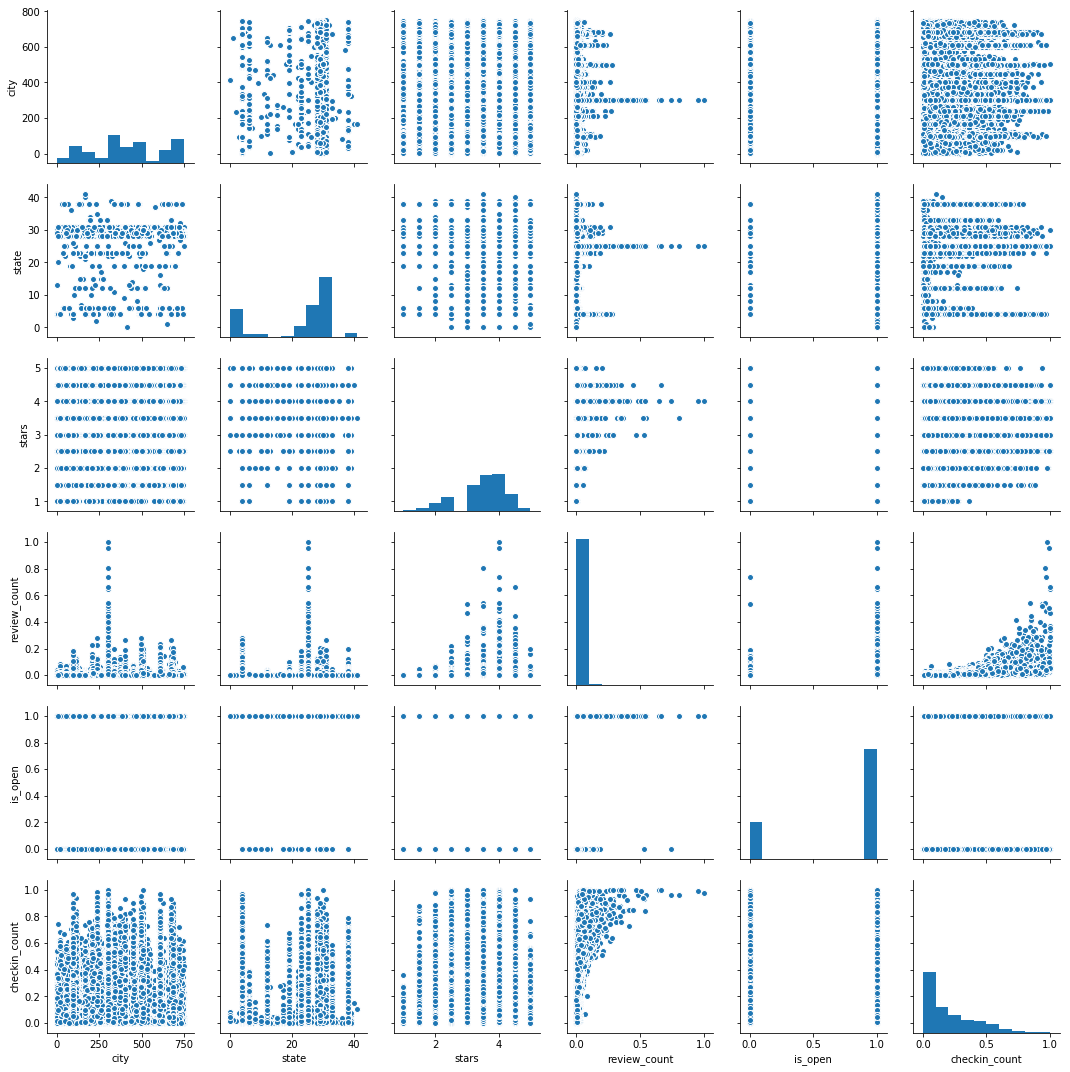

In [8]:
sns.pairplot(df_processed)
plt.show()

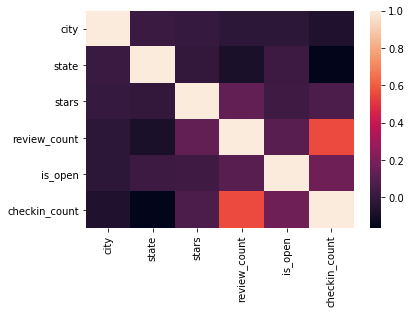

In [9]:
import seaborn as sns
corr = df_processed.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [12]:
from sklearn.linear_model import LinearRegression

import time

t0 = time.clock()

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# for idx, col_name in enumerate(X_train.columns):
#     print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

regression_model.score(X_test, y_test)

from sklearn.metrics import mean_squared_error
y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse

import math
math.sqrt(regression_model_mse)

run_time = time.clock() - t0
print('Linear Regression run in %.3f s' % run_time)

The intercept for our model is 3.4579634334465426
Linear Regression run in 0.374 s


In [14]:
import time
t0 = time.clock()

from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print (accuracy_score(y_test, y_predict))
print (precision_score(y_test, y_predict, average='weighted'))
print (recall_score(y_test, y_predict, average='weighted'))

run_time = time.clock() - t0
print('Default Decision Tree run in %.3f s' % run_time)

ValueError: Unknown label type: 'continuous'